In [1]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import euclidean_distances

# Learning Vector Quantization

The Learning Vector Quantization (LVQ) algorithm is a supervised learning algorithm that is similar to the k-Nearest Neighbors algorithm. It is a prototype-based algorithm, which means that it uses a set of prototypes to classify new samples. The prototypes are vectors that represent the different classes. The algorithm is trained by moving the prototypes towards the samples that belong to the same class and away from the samples that belong to other classes. The algorithm is trained in an iterative manner. In each iteration, a sample is randomly selected from the training set and the prototype that is closest to the sample is moved towards the sample if the sample belongs to the same class as the prototype. Otherwise, the prototype is moved away from the sample. The algorithm is trained for a fixed number of iterations. The prototypes are initialized by randomly selecting samples from the training set. The number of prototypes per class is a hyperparameter of the algorithm.

The main rules of the algorithm are:
1. If the sample belongs to the same class as the prototype, move the prototype towards the sample.
2. If the sample belongs to a different class than the prototype, move the prototype away from the sample.
3. The amount of movement is determined by the learning rate hyperparameter.
4. The algorithm is trained for a fixed number of iterations.
5. The prototypes are initialized by randomly selecting samples from the training set.
6. The number of prototypes per class is a hyperparameter of the algorithm.
7. The algorithm is trained in an iterative manner.
8. In each iteration, a sample is randomly selected from the training set.
9. The prototype that is closest to the sample is moved towards the sample if the sample belongs to the same class as the prototype.
10. Otherwise, the prototype is moved away from the sample.
11. The algorithm is trained for a fixed number of iterations.

Update rule: 
$$
\begin{equation}
\begin{split}
\text{if } y = y_{i} \text{ then } w_{i}^{new} = w_{i}^{old} + \alpha (x - w_{i}^{old}) \\ 
\text{if } y \neq y_{i} \text{ then } w_{i}^{new} = w_{i}^{old} - \alpha (x - w_{i}^{old})
\end{split}
\end{equation}
$$

where $w_{i}$ is the $i$-th prototype, $x$ is the sample, $y$ is the label of the sample, and $\alpha$ is the learning rate.


In [4]:
class LVQ(BaseEstimator, ClassifierMixin):
    def __init__(self, prototypes_per_class: int = 1, learning_rate: float = 0.1, epochs: int = 100):
        self.prototypes = None
        self.classes_ = None
        self.prototypes_per_class = prototypes_per_class
        self.learning_rate = learning_rate
        self.epochs = epochs
        
    def fit(self, X, y, return_stats: bool = True):
        self.classes_ = np.unique(y)
        self.prototypes = self.init_prototypes(X, y)
        if return_stats:
            stats = {
                'loss': [],
                'accuracy': []
            }
        for epoch in range(self.epochs):
            avg_loss = 0.0
            avg_accuracy = 0.0
            for i in range(X.shape[0]):
                x = X[i]
                label = y[i]
                winner_index = self.find_winner(x)
                
                winner_label = np.argmin(euclidean_distances([x], self.prototypes))
                if label == winner_label:
                    self.prototypes[winner_index] += self.learning_rate * (x - self.prototypes[winner_index])
                else:
                    self.prototypes[winner_index] -= self.learning_rate * (x - self.prototypes[winner_index])
                avg_loss += euclidean_distances([x], [self.prototypes[winner_index]])[0][0]
                avg_accuracy += int(label == winner_label)
            avg_loss /= X.shape[0]
            avg_accuracy /= X.shape[0]
            if return_stats:
                stats['loss'].append(avg_loss)
                stats['accuracy'].append(avg_accuracy)
        return self if not return_stats else (self, stats)
    
    def predict(self, X):
        distances = euclidean_distances(X, self.prototypes)
        return np.argmin(distances, axis=1)        
                
    def init_prototypes(self, X, y):
        prototypes = []
        for class_ in self.classes_:
            class_indices = np.where(y == class_)[0]
            class_samples = X[class_indices]
            random_samples = np.random.choice(class_samples.shape[0], self.prototypes_per_class, replace=False)
            prototypes.append(class_samples[random_samples])
        return np.concatenate(prototypes)

    def find_winner(self, x):
        distances = euclidean_distances(x.reshape(1, -1), self.prototypes)
        return np.argmin(distances)
    

# Loading the Iris dataset 

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv('../data/iris/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
scaler = StandardScaler()
encoder = LabelEncoder()

X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

X = scaler.fit_transform(X)
y = encoder.fit_transform(y)

In [8]:
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.8)

In [9]:
train_x.shape

(120, 4)

# Train LVQ

In [33]:
epochs = 100
lvq = LVQ(epochs=epochs, prototypes_per_class=3, learning_rate=0.1)
_, stats = lvq.fit(train_x, train_y, return_stats=True)

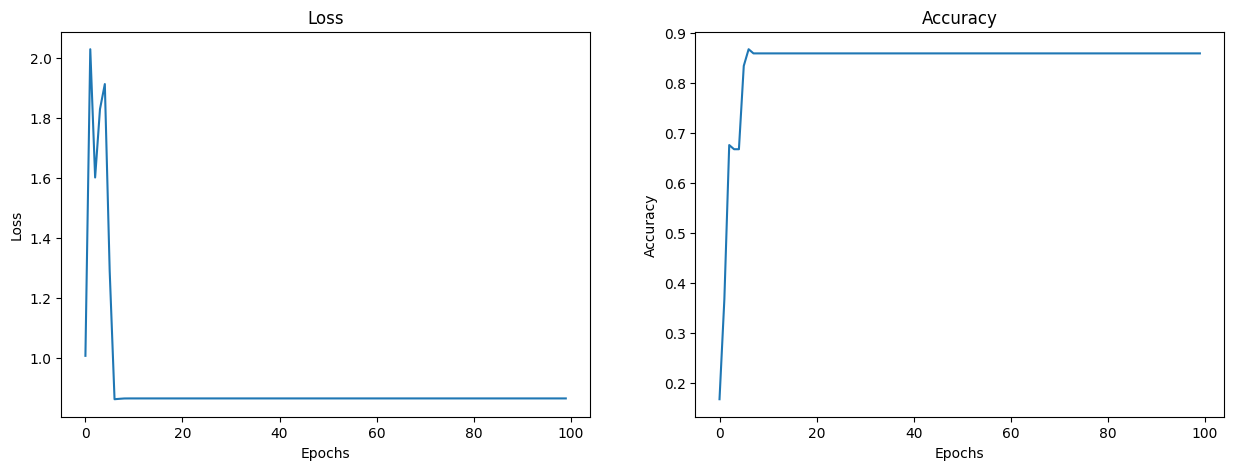

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(range(epochs), stats['loss'])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss')
ax[1].plot(range(epochs), stats['accuracy'])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy')
plt.show()

In [35]:
pred_y = lvq.predict(test_x)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_y, pred_y)

print(f'Accuracy: {accuracy}')

Accuracy: 0.8
